# Graph RAG Experiment

## Setup

In [10]:
import os
from langchain.graphs import Neo4jGraph
from lib import create_vector_index, generate_response, run_trial,create_md
from dotenv import load_dotenv
import pandas as pd

Here we use the default embedding model from the AuraDB graph builder: sentence-transformers/all-MiniLM-L6-v2

Load in the neo4j database information for authentication

In [2]:
load_dotenv()

True

Connect to our hosted db

In [3]:
url = "neo4j+s://b9009f0e.databases.neo4j.io"
username = "neo4j"
# get password from .env
password = os.getenv("NEO4J_PASSWORD")

graph = Neo4jGraph(url=url, username=username, password=password)

In [4]:
create_vector_index(graph, "entities")

In [5]:
Question = "What is EGDT?"
response, context = generate_response(graph, Question)
print(response.response)
# print(context)

Based on the provided context, EGDT stands for Early Goal-Directed Therapy. It is a treatment approach used for patients with severe sepsis, which involves early recognition and control of the source of infection, appropriate administration of antimicrobial drugs, resuscitation with intravenous fluids and vasoactive drugs, and other elements.


In [6]:
Questions = [
    "Among patients with severe sepsis or septic shock, does administration of albumin 20% solution to maintain serum albumin level ≥3 g/dL (≥30 g/L) reduce all-cause mortality at 28 days when compared to no albumin?",
    "Among patients with septic shock and relative adrenal insufficiency, do corticosteroids reduce 28-day mortality?",
    "In adult patients with septic shock, does low-dose hydrocortisone plus fludrocortisone for 7 days affect overall survival at 90 days?",
    "In patients presenting to an emergency department with severe sepsis or septic shock, does early goal-directed therapy reduce all-cause mortality at 90 days when compared to usual care?",
    "Among critically ill patients in septic shock, does low-dose hydrocortisone therapy improve survival?",
]

In [7]:
output_df = run_trial(graph, Questions)

In [8]:
output_df 

,llama3.2:latest-None,llama3.2:latest-vector,llama3.2:latest-graph,llama3.2:latest-hybrid,granite3-dense:2b-None,granite3-dense:2b-vector,granite3-dense:2b-graph,granite3-dense:2b-hybrid
Question 1,"[Based on the available evidence, the administ...","[Based on the provided context, it appears tha...",[This appears to be a summary of the results f...,[The EGDT group (Early Goal Directed Therapy) ...,"[Based on the provided context, it is not poss...",[Based on the provided context from the ALBIOS...,[The data provided appears to be a comparison ...,[The text provided seems to be a mix of two di...
Question 2,"[Based on available evidence, corticosteroids ...","[Based on the provided context, it appears tha...",[It appears that you have provided a large tex...,"[Based on the provided text and context, I wil...","[Based on the provided context, it is not poss...","[Based on the provided context, the ANNANE tri...","[Based on the provided information, here's a s...","[Based on the provided context, corticosteroid..."
Question 3,[I don't have access to any specific study or ...,"[Based on the provided context, low-dose hydro...",[I can help you summarize the text. Here's a s...,[It appears that you have provided a sample te...,"[Based on the provided context, there is no sp...","[Based on the provided context, low-dose hydro...","[Based on the provided information, corticoste...","[Based on the provided context, isone-plus-flu..."
Question 4,"[Based on the available evidence, early goal-d...",[Based on the provided context from the APROCC...,[It appears that you have a long list of condi...,[Here are the results of the analysis:\n\n1. *...,"[Based on the provided context, there is no sp...","[Based on the provided context, a study called...",[The text discusses the Early Goal-Directed Th...,"[Based on the provided context, septic shock i..."
Question 5,"[Based on the available evidence, low-dose hyd...","[Based on the provided context, low-dose hydro...",[This appears to be a large dataset of medical...,"[Based on the provided context, it appears tha...","[Based on the provided context, it is not poss...","[Based on the provided context, there is some ...","[Based on the provided information, corticoste...","[Based on the provided context, here's a summa..."


In [9]:
#write to csv
output_df.to_csv("trial1.csv", index=False)

In [14]:
output_df["llama3.2:latest-hybrid"][2]


C:\Users\johnh\AppData\Local\Temp\ipykernel_34964\1897927160.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  output_df["llama3.2:latest-hybrid"][2]


['It appears that you have provided a sample text from an FDA database related to clinical trials, specifically for the APROCCHSS trial.\n\nBased on the format [(File Name, Text),...] it seems like each line represents a unique data point or entry in the database. Here\'s a breakdown of the entries:\n\n1. `(\'APROCCHSS.txt\', \'with hydrocortisone plus fludrocortisone.\')`: This entry indicates that the file name is "APROCCHSS.txt" and contains text related to the trial being conducted with hydrocortisone plus fludrocortisone.\n2. `(\'APROCCHSS.txt\', \'The mechanisms by which corticosteroids may favorably affect the outcome of patients with septic shock have been detailed recently.7 In brief, corticosteroids improve cardiovascular function by restoring effective blood volume through increased mineralocorticoid activity and by increasing systemic vascular resistance, an effect that is partly related to endothelial glucocorticoid receptors.20 This might explain why in our trial there wa

In [15]:
output_df["llama3.2:latest-None"][2]

C:\Users\johnh\AppData\Local\Temp\ipykernel_34964\1484187326.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  output_df["llama3.2:latest-None"][2]


["I don't have access to any specific study or data that directly addresses the question of whether low-dose hydrocortisone plus fludrocortisone for 7 days affects overall survival at 90 days in adult patients with septic shock.\n\nHowever, I can provide some general information on the topic. Septic shock is a severe and potentially life-threatening condition that requires prompt and effective treatment. Corticosteroids, such as hydrocortisone and fludrocortisone, have been used in various combinations to treat septic shock due to their anti-inflammatory properties.\n\nThe use of low-dose hydrocortisone plus fludrocortisone for 7 days has been explored in clinical trials and observational studies. While these studies suggest that corticosteroid therapy may improve hemodynamic stability, renal function, and organ perfusion in patients with septic shock, the evidence regarding overall survival at 90 days is limited.\n\nA systematic review of 17 studies on the use of corticosteroids in se

In [4]:
create_md('trial1.csv', 'trial1.md',questions=Questions)

# Trial Setup

In [7]:
output_path = 'trial_outputs/'
for i in range(10):
    print(f"Running trial {i}")
    output_df = run_trial(graph, Questions)
    output_df.to_csv(output_path + f"trial{i}.csv", index=False)
    create_md(output_path + f"trial{i}.csv", output_path + f"trial{i}.md", questions=Questions)


Running trial 0
Running trial 1
Running trial 2
Running trial 3
Running trial 4
Running trial 5
Running trial 6
Running trial 7
Running trial 8
Running trial 9


## Output from LM


In [16]:
import pandas as pd
import glob

# List of CSV files
csv_files = glob.glob('eval_outputs/eval*.csv')

# Initialize a list to store dataframes
dfs = []

# Read each CSV file and append to the list
for file in csv_files:
    df = pd.read_csv(file)
    dfs.append(df)

# Concatenate all dataframes
combined_df = pd.concat(dfs)

# Group by 'Question' and calculate the mean for each group
average_df = combined_df.groupby('Question').mean().reset_index()

# Write the averaged values to a new CSV file
average_df.to_csv('average_eval.csv', index=False)

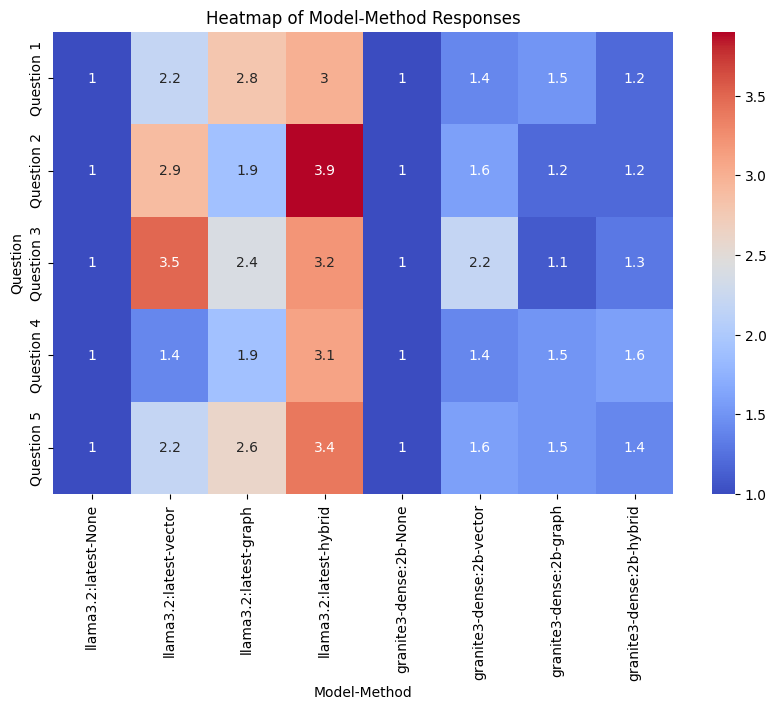

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('average_eval.csv')

# Set the 'Question' column as the index
df.set_index('Question', inplace=True)

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, cmap='coolwarm', cbar=True)

# Set the title and labels
plt.title('Heatmap of Model-Method Responses')
plt.xlabel('Model-Method')
plt.ylabel('Question')

# Show the heatmap
plt.show()